<a href="https://colab.research.google.com/github/BamByeol/learning-ML/blob/main/HW1113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#파일 직접 업로드하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#불러올 파일의 경로를 filename 변수에 저장
filename = '/content/drive/MyDrive/1113/economy.csv'

In [ ]:
#pandas read_csv로 불러오기
data = pd.read_csv(filename)
data.head()

,tradeprice_sido_n1,date,region_cd,tradeprice_sido,year,month,building_type,construction_realized_amount,cd,spirit_deposit_rate,exchange_rate,composite_stock_price_index,economy_growth,exchequer_bond_three,household_loan_all,mortgage_all,numberofnosells,unsalenum_c
0,69.5,2006-01-01,48000,69.4,2006,1,0,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
1,64.6,2006-01-01,48000,64.5,2006,1,1,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
2,69.7,2006-01-01,47000,69.3,2006,1,1,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
3,94.2,2006-01-01,45000,94.2,2006,1,7,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN
4,80.0,2006-01-01,48000,80.0,2006,1,7,4867793.0,4.15,4.06,971.0,1379.32,1.8,5.02,NaN,NaN,NaN,NaN


In [ ]:
#데이터를 읽어와서 pandas dataframe으로 저장
import pandas as pd
import matplotlib
import sklearn


df = pd.read_csv(filename, parse_dates =["date"], index_col ="date") 
df = df.dropna()
df.head()

,tradeprice_sido_n1,region_cd,tradeprice_sido,year,month,building_type,construction_realized_amount,cd,spirit_deposit_rate,exchange_rate,composite_stock_price_index,economy_growth,exchequer_bond_three,household_loan_all,mortgage_all,numberofnosells,unsalenum_c
date,,,,,,,,,,,,,,,,,
2010-01-01,93.4,45000,93.3,2010,1,7,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,0.0,0.0
2010-01-01,83.9,30000,83.1,2010,1,0,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0
2010-01-01,92.7,30000,92.3,2010,1,7,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0
2010-01-01,80.8,30000,79.7,2010,1,1,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0
2010-01-01,81.8,30000,81.8,2010,1,3,6500576.0,2.88,3.93,1156.5,1682.16,2.2,4.29,548723.3,338666.3,3042.0,323.0


In [ ]:
#dropna 함수로 속성에 빈 값이 있는 데이터는 실험에서 제거
train = df[(df.year > 2006) & (df.year < 2017)]
test = df[df.year >= 2017]



feature_names = ['region_cd', 'year', 'month', 'building_type',
                 'tradeprice_sido', 'construction_realized_amount','cd',
                 'spirit_deposit_rate','exchange_rate','composite_stock_price_index',
                 'economy_growth','exchequer_bond_three','household_loan_all',
                 'mortgage_all','numberofnosells','unsalenum_c']



X_train = train[feature_names]
X_test = test[feature_names]

lable_name = "tradeprice_sido_n1"
Y_train = train[lable_name]

Y_test = test[lable_name]


print(X_train.shape)
print(X_test.shape)

(5560, 16)
(992, 16)


In [ ]:
#fit_intercept는 y 절편을 계산할지에 대한 설정
#normalize는 regressors X를 정규화 시킬 것인지에 대한 옵션
#n_jobs 는 모델 계산에 사용될 작업 개수를 의미
#데이터 개수가 작아 None으로 설정
from sklearn.linear_model import LinearRegression


lm = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm.fit(X_train, Y_train)
accuracy = lm.score(X_test, Y_test)
print ('Linear Regression test file accuracy:'+ str(accuracy))

lm.coef_

Linear Regression test file accuracy:0.796032793305405


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


array([ 3.51896797e-06, -1.71715684e-01, -5.85130446e-03, -1.48964006e-02,
        9.79620046e-01, -1.94257889e-08,  3.17369529e-01, -2.01082058e-01,
        1.47889144e-04,  1.00122036e-03,  2.30943196e-01,  2.53803737e-02,
       -3.12292845e-06,  1.23915308e-05, -1.68226873e-05, -7.31652503e-06])

In [ ]:
#한글 속성 이름으로 변경하고 절대값이 큰 순서로 정렬해서 pandas dataframe으로 다시 확인
X_Cols = X_train.rename(columns= {'region_cd': '지역코드(시도)', 'year': '연도', 'month':'월',  'building_type': '부동산타입',  
                               'tradeprice_sido' : '매매가격지수(시도)', 'construction_realized_amount' : '건설기성액(백만원)', "cd": "cd(91일물)",
                                'spirit_deposit_rate': '정기예금금리', 'exchange_rate': '환율', 'composite_stock_price_index': '종합주가지수',
                               'economy_growth': '경제성장률','exchequer_bond_three' : '국고채3년','household_loan_all': '가계대출액(전국)',
                               'mortgage_all' : '주택대출액(전국)', 'numberofnosells':'미분양 가구수(시도)','unsalenum_c':'공사완료후 미분양(민간,시도)' })

print(X_train.columns)
coefs = pd.DataFrame(zip(X_Cols.columns,lm.coef_), columns = ['features', 'coefficients'])


coefs.reindex(coefs.coefficients.abs().sort_values(ascending=False).index)

Index(['region_cd', 'year', 'month', 'building_type', 'tradeprice_sido',
       'construction_realized_amount', 'cd', 'spirit_deposit_rate',
       'exchange_rate', 'composite_stock_price_index', 'economy_growth',
       'exchequer_bond_three', 'household_loan_all', 'mortgage_all',
       'numberofnosells', 'unsalenum_c'],
      dtype='object')


,features,coefficients
4,매매가격지수(시도),9.796200e-01
6,cd(91일물),3.173695e-01
10,경제성장률,2.309432e-01
7,정기예금금리,-2.010821e-01
1,연도,-1.717157e-01
11,국고채3년,2.538037e-02
3,부동산타입,-1.489640e-02
2,월,-5.851304e-03
9,종합주가지수,1.001220e-03
8,환율,1.478891e-04


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

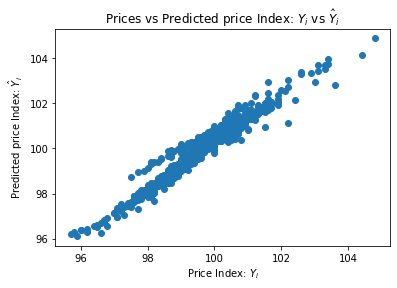

In [ ]:
#테스트셋의 실제 값을 x축으로 예측 값을 y축으로 그래프를 그리기
%matplotlib inline
import matplotlib.pyplot as plt


Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")